In [2]:
from osgeo import gdal
import seaborn as sns
%matplotlib inline
import folium
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
filename = '../data/mapping_data/META_GEOTIFF_1B.csv'
import pandas as pd
legend = pd.read_csv(filename)
#legend.head()
legend.VARIABLE_NAME.unique()

array(['Depth to bedrock (R horizon) up to 200 cm',
       'Probability of occurrence of R horizon',
       'Absolute depth to bedrock (in cm)',
       'Bulk density (fine earth) in kg / cubic-meter',
       'Cation exchange capacity of soil in cmolc/kg',
       'Clay content (0-2 micro meter) mass fraction in %',
       'Coarse fragments volumetric in %',
       'Soil organic carbon stock in tons per ha',
       'Soil organic carbon density in kg per cubic-m',
       'Soil organic carbon content (fine earth fraction) in g per kg',
       'Soil pH x 10 in H2O ', 'Soil pH x 10 in KCl',
       'Silt content (2-50 micro meter) mass fraction in %',
       'Sand content (50-2000 micro meter) mass fraction in %',
       'Texture class (USDA system)', 'WRB 2006 class', 'USDA 2014 class',
       'Available soil water capacity (volumetric fraction) for h1',
       'Available soil water capacity (volumetric fraction) for h2',
       'Available soil water capacity (volumetric fraction) for h3',
 

In [5]:
filename = '../data/mapping_data/ORCDRC_M_sl1_250m_ll.tif' 
#Soil organic carbon content (fine earth fraction) in g per kg at depth 0.00 m

# read tiff file
dataset = gdal.Open(filename, gdal.GA_ReadOnly)

header = dataset.GetMetadata_Dict()
#print(header['LEGEND'])
print(header)
#print(67200*172800)

{'AREA_OR_POINT': 'Area', 'ATTRIBUTE_LABEL': 'ORCDRC_M_sl1', 'ATTRIBUTE_MEASUREMENT_RESOLUTION': '1', 'ATTRIBUTE_TITLE': 'Soil organic carbon content (fine earth fraction) in g per kg at depth 0.00 m', 'ATTRIBUTE_UNITS_OF_MEASURE': 'g / kg', 'CITATION_ADDRESS': 'tom.hengl@isric.org', 'CITATION_ORIGINATOR': 'ISRIC - World Soil Information', 'CITATION_URL': 'http://dx.doi.org/10.1371/journal.pone.0169748', 'CONFIDENCE_INTERVAL': 'M', 'DATA_FORMAT': 'Int16', 'DEPTH': '0.00 m', 'DOWNLOAD_FTP_URL': 'ftp://ftp.soilgrids.org/data/recent/ORCDRC_M_sl1_250m_ll.tif', 'HORIZON_LOWER_DEPTH': '0.00 m', 'HORIZON_UPPER_DEPTH': '0.00 m', 'KEYWORD1': 'organic', 'KEYWORD2': 'carbon', 'NO_DATA': '-32768', 'PROJECT_URL': 'http://soilgrids.org', 'PUBLICATION_DATE': '2017-03-10', 'RANGE_DOMAIN_MAXIMUM': '800', 'RANGE_DOMAIN_MINIMUM': '0', 'SERIES_NAME': 'SoilGrids250m', 'SLD_NAME': 'soilgrids250m:ORCDRC', 'SLD_URL': 'ftp://ftp.soilgrids.org/legends/ORCDRC.sld', 'TECHNICAL_SPECIFICATIONS_URL': 'https://github

In [6]:
# get data and convert to an array 
band = dataset.GetRasterBand(1) # this map only has one band
array = band.ReadAsArray()
print(array.shape)

# plot a portion of the map (it's really big)
#sns.heatmap(array[10000:13000, 10000:13000], xticklabels=500, yticklabels=500)
#sns.heatmap(array, xticklabels=500, yticklabels=500)

(67200, 172800)


(38000, 40000)
(380, 400)
[[ 1  1  1 ...,  2  3  3]
 [ 1  1  1 ...,  0  0  4]
 [ 1  1  1 ...,  0  1 14]
 ..., 
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]


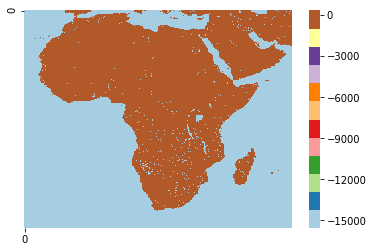

In [13]:
SOC = array
africaSOC = SOC[22000:60000, 76000:116000]
print(africaSOC.shape)
africaSOC_ds = africaSOC[::100,::100]
print(africaSOC_ds.shape)
print(africaSOC_ds)
np.place(africaSOC_ds, africaSOC_ds==1, [50000])
norm=LogNorm(vmin=africaSOC_ds.min(), vmax=africaSOC_ds.max())
sns.heatmap(africaSOC_ds, xticklabels=500, yticklabels=500, cmap='Paired')

In [60]:
filename = '../data/mapping_data/PHIHOX_M_sl1_250m_ll.tif' 
#Soil pH x 10 in H2O  at depth 0.00 m

# read tiff file
dataset = gdal.Open(filename, gdal.GA_ReadOnly)

band = dataset.GetRasterBand(1) # this map only has one band
pH = band.ReadAsArray()
print(pH.shape)

(67200, 172800)


(672, 1728)


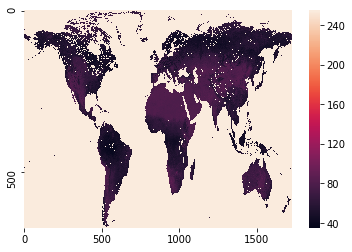

In [77]:
downsample = pH[::100,::100]
print(downsample.shape)
sns.heatmap(downsample, xticklabels=500, yticklabels=500)

(38000, 40000)
(380, 400)
[[ 1  1  1 ..., 77 77 78]
 [ 1  1  1 ..., 77 78 76]
 [ 1  1  1 ..., 77 77 78]
 ..., 
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]
 [ 1  1  1 ...,  1  1  1]]
(380, 400)
[[ 0.1  0.1  0.1 ...,  7.7  7.7  7.8]
 [ 0.1  0.1  0.1 ...,  7.7  7.8  7.6]
 [ 0.1  0.1  0.1 ...,  7.7  7.7  7.8]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]


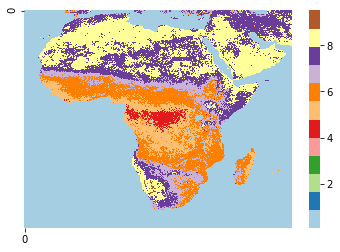

In [92]:
africapH = pH[22000:60000, 76000:116000]
print(africapH.shape)
africapH_ds = africapH[::100,::100]
print(africapH_ds.shape)
print(africapH_ds)
#clean = africapH_ds != 255
np.place(africapH_ds, africapH_ds==255, [10])
africapH_ds=africapH_ds/10.
#africapH_ds_clean = africapH_ds[clean]
print(africapH_ds.shape)
print(africapH_ds)
from matplotlib.colors import LogNorm
norm=LogNorm(vmin=africapH_ds.min(), vmax=africapH_ds.max())
sns.heatmap(africapH_ds, xticklabels=500, yticklabels=500, cmap="Paired")

In [9]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

plot_width  = int(750)
plot_height = int(plot_width//1.2)
x_range = 

%%time
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
img = tf.shade(agg, cmap=["white", 'darkblue'], how='linear')

SyntaxError: invalid syntax (<ipython-input-9-26c2eca794b4>, line 1)

(67200, 172800)


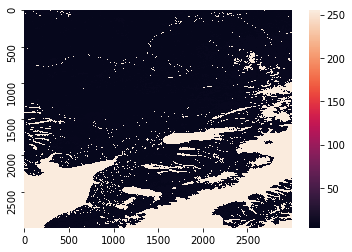

In [4]:
print(array.shape)
sns.heatmap(array[10000:13000, 10000:13000], xticklabels=500, yticklabels=500)

In [70]:
#afmap = folium.Map(location=[-4, 21], zoom_start=3)
#afs_geo = 'mapping_data/afs.json'

#folium.GeoJson(open('mapping_data/afs.json'),name='geojson').add_to(afmap)
import geopandas as gpd
#shape = gpd.read_file('../data/mapping_data/AfricanCountires.shp')
#shape.crs
#shape.plot()

shp = gpd.GeoDataFrame.from_file('../data/mapping_data/AfricanCountires.shp')
#shp = gpd.GeoDataFrame.from_file('../data/mapping_data/Africa.shp')

print(shp.head())
print(shp.COUNTRY.unique())
print('unique countries = ', len(shp.COUNTRY.unique()))

polys = shp.geometry.values

print(len(polys))

#import shapefile
from shapely.geometry import shape, Point
import pandas as pd

# read your shapefile
#r = shapefile.Reader('../data/mapping_data/AfricanCountires.shp')
# get the shapes
#shapes = r.shapes()


def check(lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)
    # the contains function does exactly what you want
    return polygon.contains(point)

df = pd.read_csv('../data/mapping_data/avg_rainfall.csv')
contained_in = []
for lat, long in zip(df.lat.values, df.long.values):
    # build a shapely polygon from your shape
    gotit = False
    #print(lat,long)
    for poly, country in zip(polys, shp.COUNTRY.values):
        polygon = shape(poly)
        #print('   checking', country)
        if gotit:
            break;
        if check(long, lat):
            contained_in.append(country)
            #print(country, check(long, lat))
            gotit = True
    if not gotit: #if never find it
        contained_in.append('None')

print(len(contained_in))
#print(contained_in)
print(len(df.lat.values))
ctry = pd.Series(contained_in)
df['Country'] = ctry.values
#df.to_csv('../data/mapping_data/avg_rainfall_country.csv')
#df.head()

#for lat, long in zip(df.lat.values[:10], df.long.values[:10]):
#    print(lat,long)

#folium.GeoJson(shp).add_to(afmap)

#afmap

  CONTINENT  COUNTRY COUNTRYAFF ISO_CC  Land_Rank          Land_Type  \
0    Africa  Algeria    Algeria     DZ          5       Primary land   
1    Africa  Algeria    Algeria     DZ          2       Small island   
2    Africa  Algeria    Algeria     DZ          1  Very small island   
3    Africa   Angola     Angola     AO          5       Primary land   
4    Africa   Angola     Angola     AO          2       Small island   

   OBJECTID  Shape_STAr  Shape_STLe  \
0         5  213.064345   76.492678   
1         6    0.000057    0.043855   
2         7    0.000169    0.316232   
3         9  103.769595   69.704554   
4        10    0.016628    2.854778   

                                            geometry  
0  (POLYGON ((7.214068629064002 37.08835575501411...  
1  POLYGON ((-1.129058201874443 35.72460367751773...  
2  (POLYGON ((-1.476443665142995 35.3176683126425...  
3  (POLYGON ((13.23957005831159 -9.20037470562812...  
4  (POLYGON ((11.70059379097074 -16.5078875572648...  
['

In [76]:
df = pd.read_csv('../data/mapping_data/avg_rainfall_country.csv')
tr = df['Country'] == 'None'
print(sum(tr))


326


In [3]:
rainfile = '../data/mapping_data/TRMM3B42ALT_199801_201505.tif'
raindata = gdal.Open(rainfile, gdal.GA_ReadOnly)
#raindata.GetMetadata()
header = raindata.GetMetadata_Dict()
#print(header['LEGEND'])
print(header)
N = raindata.RasterCount # this map only has one band
print(N)
#array = band.ReadAsArray()
#print(array.shape)

{'AREA_OR_POINT': 'Area'}
1


(264, 246)


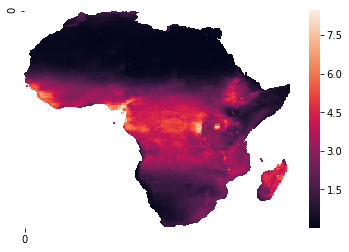

In [4]:
# get data and convert to an array 
band = raindata.GetRasterBand(1) 
array = band.ReadAsArray()
#array = array[::2,::2]
print(array.shape)
#print(array[100,100])
#print(type(array[100,100]))
# plot a portion of the map (it's really big)
#array[130:134,100:126] = 0 #find the center
#array[:4,:4] = 0 #find the center

sns.heatmap(array, xticklabels=500, yticklabels=500)

#print(array[263,245])


In [5]:
padfTransform = raindata.GetGeoTransform()
#print(a,b,c,d,e,f)

Nrows=array.shape[0]
Ncols=array.shape[1]

#padfTransform = np.array([a,b,c,d,e,f])
P = np.arange(0,Ncols)
L = np.arange(0,Nrows)

#Xp = np.zeros_like(L)
#Yp = np.zeros_like(P)

#originX = geotransform[0]
#originY = geotransform[3]

if (padfTransform[2]==0.0) and (padfTransform[4]==0.0):
    Xp = padfTransform[0] + P*padfTransform[1]
    Yp = padfTransform[3] + L*padfTransform[5]
else:
    print('ahhhh')
    #-3960000.0 30000.0 0.0 3570000.0 0.0 -30000.0
    #Xp = padfTransform[0] + P*padfTransform[1] + L*padfTransform[2];
    #Yp = padfTransform[3] + P*padfTransform[4] + L*padfTransform[5];
if 0:
    index = np.meshgrid(L,P).as_matrix()
    translation = [[a, 0, 0] [0,e,0] [0,0,1]]
    coords = index* (translation + scale)

#c = x-coordinate of the upper-left corner of the upper-left pixel
#a = width of a pixel
#b = row rotation (typically zero)
#f = y-coordinate of the of the upper-left corner of the upper-left pixel
#d = column rotation (typically zero)
#e = height of a pixel (typically negative)

#print(Xp)
#print(Yp)

rowcoord,colcoord = np.meshgrid(Yp, Xp, indexing='ij')
print(rowcoord.shape)
print(rowcoord[0,0], colcoord[0,0])

val = raindata.GetProjection()
print(val)
print(type(val))


import math

    
import osr
srs = osr.SpatialReference()
srs.ImportFromWkt(raindata.GetProjection())

#default values
srsLatLong = srs.CloneGeogCS()
print(srsLatLong)
ct = osr.CoordinateTransformation(srs,srsLatLong)

#using the wikipedia def
#new_cs = osr.SpatialReference()
#new_cs.ImportFromWkt(wgs84_wkt)
#print(new_cs)
#ct = osr.CoordinateTransformation(srs,new_cs)

cr = np.int(Nrows/2)
cc = np.int(Ncols/2)
res = ct.TransformPoint(Xp[cc],Yp[cr]) #should be 5 lat, 20 long
print('center')
print(res[0], res[1])
res = ct.TransformPoint(Xp[0], Yp[0]) 
print('topleft')
print(res[0], res[1])


points = []
#Zp = np.zeros_like(Xp)

for i, xval in enumerate(Xp):
    for j, yval in enumerate(Yp):
        #x = xx[i,j]
        #y = yy[i,j]
        res = ct.TransformPoint(xval,yval)
        y = res[0] #long
        x = res[1] #lat
        z = array[j,i] #value
        if z > 0.0:
            point = [x,y,z]
            points.append(point)
    
print(type(points))
#print(points)


(264, 246)
3570000.0 -3960000.0
PROJCS["Lambert Azimuthal Equal Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",5],PARAMETER["longitude_of_center",20],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
<class 'str'>
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
center
17.57469695536521 1.4688587679881608
topleft
-23.07024748424406 34.451527257837974
<class 'list'>


In [10]:
df = pd.DataFrame(points, columns=['lat','long', 'avg_rainfall'])
#df.to_csv('../data/mappingdata/avg_rainfall.csv')
print(df.describe())
print(df['avg_rainfall'].min())

                lat          long  avg_rainfall
count  33176.000000  33176.000000  33176.000000
mean       6.309975     18.330506      1.862550
std       17.077066     15.504962      1.633375
min      -34.537138    -17.375158      0.003165
25%       -6.420396      7.562332      0.252087
50%        9.039553     20.269850      1.505693
75%       19.710358     29.977396      3.163883
max       37.221742     50.908614      8.457171
0.00316493189894


In [7]:
import matplotlib.cm as cm
import matplotlib

def convert_to_hex(rgba_color):
    red = int(rgba_color[0]*255)
    green = int(rgba_color[1]*255)
    blue = int(rgba_color[2]*255)
    return '#{r:02x}{g:02x}{b:02x}'.format(r=red,g=green,b=blue)

from matplotlib.colors import LogNorm


def color(x, scalemin=df['avg_rainfall'].min(), scalemax=df['avg_rainfall'].max(), log=True):
    if log:
        norm=LogNorm(vmin=scalemin, vmax=scalemax)
    else:
        norm = matplotlib.colors.Normalize(vmin=scalemin, vmax=scalemax)
    cmap = cm.RdBu
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    return convert_to_hex(m.to_rgba(x))
    

print(color(5.16))

#165190


In [40]:
af = folium.Map(location=[-4, 21], zoom_start=3, tiles='cartodbpositron')

plist = []
for lat, long in zip(df.lat.values,df.long.values):
    plist.append([lat,long])

#from folium.plugins import HeatMap
#HeatMap(df.values.tolist(), radius=5, blur=0, gradient={0.0: 'red', 0.65: 'lime', 1: 'blue'}).add_to(af)

for idx, p in enumerate(plist[:5]):
    rain = df.avg_rainfall.values[idx]
    col_idx = color(rain, log=False)
    folium.CircleMarker(location=p,radius=2, popup=str(rain), fill_color=col_idx, color=col_idx).add_to(af)
af

In [21]:
import shapefile
from shapely.geometry import shape, Point
import pandas as pd

# read your shapefile
r = shapefile.Reader('../data/mapping_data/AfricanCountires.shp')
# get the shapes
shapes = r.shapes()

# build a shapely polygon from your shape
polygon = shape(shapes[0])
print(len(polygon))

def check(lon, lat):
    # build a shapely point from your geopoint
    point = Point(lon, lat)
    # the contains function does exactly what you want
    return polygon.contains(point)

df = pd.read_csv('../data/mapping_data/avg_rainfall.csv')
for lat, long in zip(df.lat.values[:5], df.long.values[:5]):
    print(check(long, lat))

AttributeError: 'Reader' object has no attribute 'head'

In [15]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

plot_width  = int(750)
plot_height = int(plot_width//1.2)
#x_range = (0,100)
#y_range = 


cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)#, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'long','lat', ds.mean('avg_rainfall'))
#print(list(agg))


/Users/kate/miniconda3/envs/cdips/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


<class 'datashader.transfer_functions.Image'>


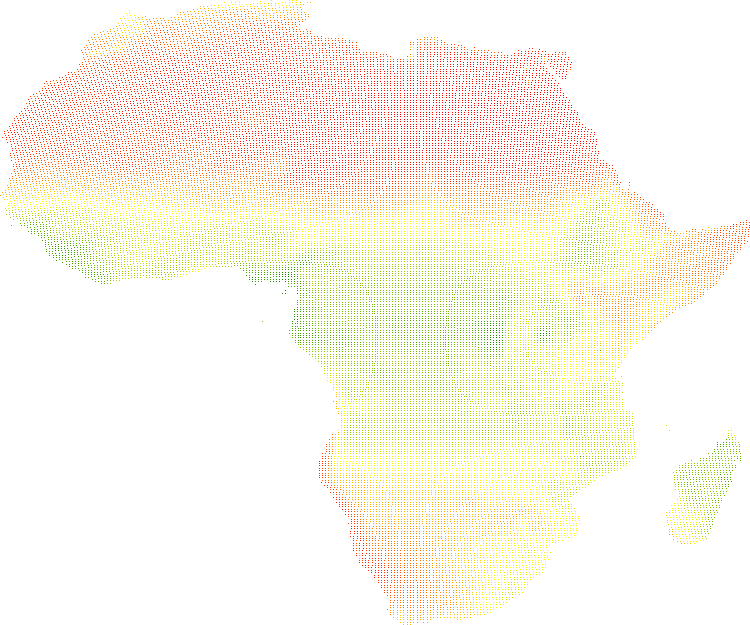

In [43]:
img = tf.shade(agg, cmap=['red','yellow', 'green'], how='log')
print(type(img))
img

In [42]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER

bound = 2000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, 2*bound), y_range=(-2*bound, 2*bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TONER)
output_file("stamen_toner_plot.html")
show(fig)

In [37]:
import numpy as np

data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[48, 5, 1]]))

print(data.shape)

data=data.tolist()
#print(data)

from folium.plugins import HeatMap

m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=3)

HeatMap(data).add_to(m)

m

(100, 3)
